# Cross Stitch Patterns from Images

**Author:** [J.L. Klay](jlklay@gmail.com)

This code will create a counted cross-stitch pattern from an image by pixellating it, determining color maps and replacing each pixel by a symbol on a pattern grid for each color.  One can choose how many different colors to allow for a given image so that it is possible to minimize the complexity.  The pattern is output to a file called `Pattern.pdf`.

##Example Usage

Here is an example of how the code is used to create the pattern, showing the steps of the process, with helpful display output.  To create your own pattern, just modify the list of inputs and execute the remaining code cells.  The default pattern created here is from a Higgs Boson Event image on wikipedia.  The pattern can be created at the bottom of this notebook with one call to the `testme` function provided with the code library.

In [7]:
#Preliminaries
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import requests
from StringIO import StringIO

Populating the interactive namespace from numpy and matplotlib


In [8]:
#Import the StitchIt library
import StitchIt as st

##Define the pattern inputs

In [9]:
#Define the inputs
imgurl = "http://upload.wikimedia.org/wikipedia/commons/1/1c/CMS_Higgs-event.jpg" #image file to pattern
pattern_name = "Higgs Boson Event" #Name for pattern
aidacolor = "black" #cloth color
aidasize = 14 #number of stitches per inch of aida cloth
reduct = 25 #Reduce the image size to this percent of the original
numcol = 24 #number of colors to reduce image to

## Retrieve the image file

Pixel dimensions: (1104 x 1018)
Aida Cloth count: 14
Pattern dimensions: (78.86 in x 72.71 in)
Pattern colors: 237120


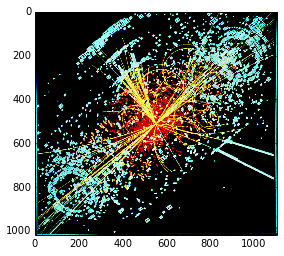

In [13]:
#Retrieve image file
response = requests.get(imgurl)
before = ndi.imread(StringIO(response.content))
plt.imshow(before);
x,y = st.aida_size(before,aidasize,verbosity=1)

## Reduce the image size

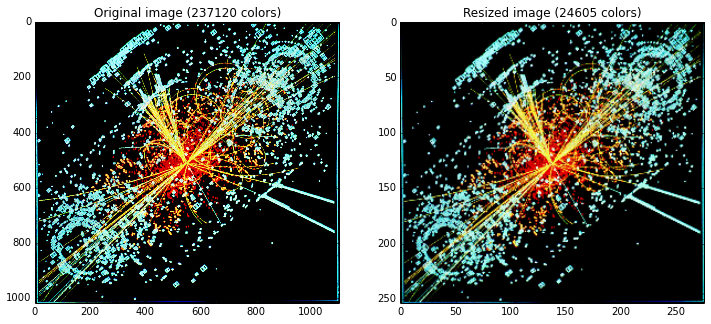

Pixel dimensions: (276 x 254)
Aida Cloth count: 14
Pattern dimensions: (19.71 in x 18.14 in)
Pattern colors: 24605


In [17]:
#Reduce the size of the image
smaller = st.resize(before,reduct)
st.plot_before_after(before,smaller,"Resized")
x,y = st.aida_size(smaller,aidasize,verbosity=1)

##Reduce the number of image colors

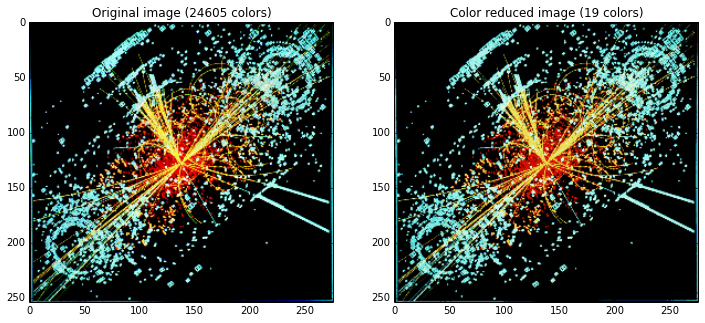

Pixel dimensions: (276 x 254)
Aida Cloth count: 14
Pattern dimensions: (19.71 in x 18.14 in)
Pattern colors: 19


In [19]:
#Reduce the number of colors in the image
colors, counts, after = st.reduce_colors(smaller, numcol)
st.plot_before_after(smaller,after,"Color reduced")
x,y = st.aida_size(after,aidasize,verbosity=1)

## Match DMC floss colors and replace them in image

Counts	RGBColor	Floss#	FlossRGB	#Skeins	FlossName
46194 	[0 0 0] 	310 	[0 0 0] 	 20.35 	['Black' '000000']
2973 	[173 242 233] 	3811 	[188 227 230] 	 1.31 	['Turquoise Very Light ' 'BCE3E6']
2304 	[129 235 228] 	3766 	[153 207 217] 	 1.01 	['Peacock Blue Light ' '99CFD9']
2076 	[217 245 227] 	775 	[217 235 241] 	 0.91 	['Baby Blue Very Light ' 'D9EBF1']
1503 	[230 207  51] 	725 	[255 200  64] 	 0.66 	['Topaz Med Lt ' 'FFC840']
1434 	[10 28 20] 	3371 	[30 17  8] 	 0.63 	['Black Brown ' '1E1108']
1390 	[56  9  5] 	938 	[54 31 14] 	 0.61 	['Coffee Brown Ult Dk ' '361F0E']
1297 	[233 230 111] 	3819 	[224 232 104] 	 0.57 	['Moss Green Lt ' 'E0E868']
1290 	[214  13   4] 	817 	[187   5  31] 	 0.57 	['Coral Red Very Dark' 'BB051F']
1226 	[ 71 224 221] 	996 	[ 48 194 236] 	 0.54 	['Electric Blue Medium ' '30C2EC']
1112 	[ 50 172 169] 	958 	[ 62 182 161] 	 0.49 	['Sea Green Dark ' '3EB6A1']
1043 	[212 112  26] 	922 	[226 115  35] 	 0.46 	['Copper Light ' 'E27323']
1040 	[ 29 113 131] 	3842 	[ 50

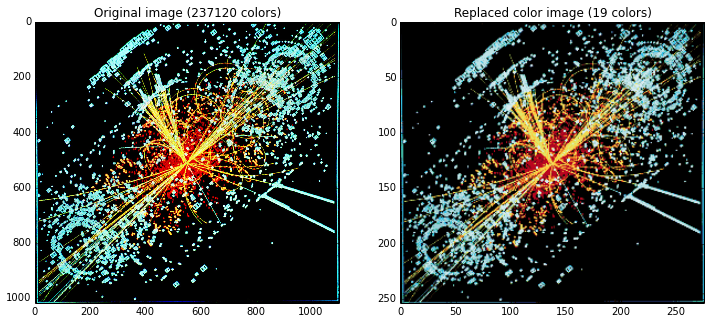

Pixel dimensions: (276 x 254)
Aida Cloth count: 14
Pattern dimensions: (19.71 in x 18.14 in)
Pattern colors: 19


In [22]:
#Find the best-matched floss colors for the colors in the reduced image
summary = st.floss_color_counts(colors,counts,aidasize,verbosity=1)
#Replace colors in the image with matched floss colors one at a time
print "\nReplacing colors in image:"
for (skeins, floss, name, oldcolor, matchedcolor) in summary:
    st.replace_color(after,oldcolor,matchedcolor,verbosity=1)

st.plot_before_after(before,after,"Replaced color")
x,y = st.aida_size(after,aidasize,verbosity=1)

##Is it a good match?

If the color matched image is not to your liking, you can inspect the available floss colors and replace any/all of them with other colors using the `replace_color` function.

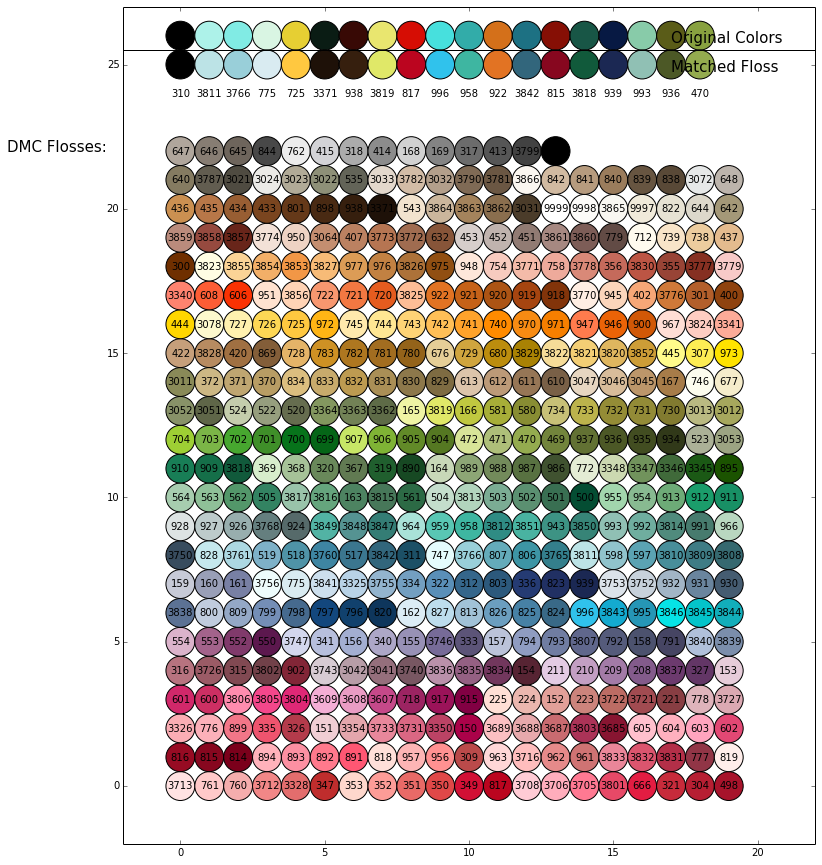

In [23]:
#Show the DMC color matches
st.view_colors(summary)

##Create the final pattern

Assuming you are happy with the way the image looks, you can now create the final pattern from the transformed image.

In [24]:
#Create the final pattern
print "Creating your pattern in a file called Pattern.pdf.  Enjoy!"
st.make_pattern(before,after,aidasize,imgurl,pattern_name,aidacolor)

Creating your pattern in a file called Pattern.pdf.  Enjoy!
Adding Cover page
Adding page 0
Adding page 1
Adding page 2
Adding page 3
Adding page 4
Adding page 5
Adding page 6
Adding page 7
Adding page 8
Adding page 9
Adding page 10
Adding page 11
Adding page 12
All DONE!


---

#Create the default Higgs Boson pattern with one function call

If you don't want to go through all the steps yourself, or you've modified the code to make a pattern from your own image, you can still get the Higgs Boson pattern by executing the following cell.

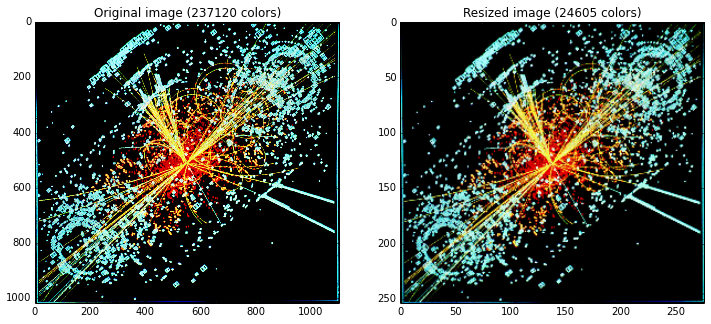

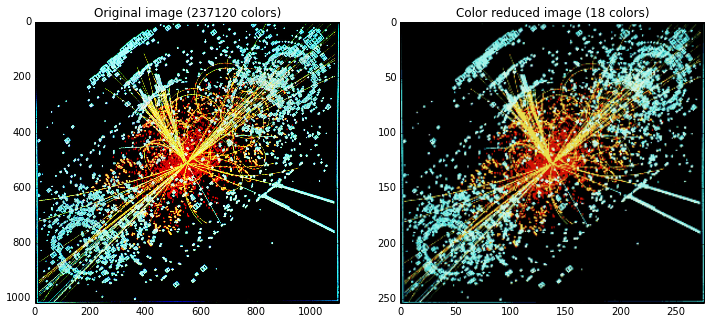

Counts	RGBColor	Floss#	FlossRGB	#Skeins	FlossName
41627 	[0 0 0] 	310 	[0 0 0] 	 18.34 	['Black' '000000']
4853 	[5 1 5] 	310 	[0 0 0] 	 2.14 	['Black' '000000']
3702 	[160 240 231] 	964 	[169 226 216] 	 1.63 	['Sea Green Light ' 'A9E2D8']
2710 	[213 244 225] 	775 	[217 235 241] 	 1.19 	['Baby Blue Very Light ' 'D9EBF1']
2336 	[233 222  78] 	726 	[253 215  85] 	 1.03 	['Topaz Light ' 'FDD755']
2091 	[101 230 224] 	959 	[ 89 199 180] 	 0.92 	['Sea Green Med ' '59C7B4']
1419 	[213  17   5] 	817 	[187   5  31] 	 0.63 	['Coral Red Very Dark' 'BB051F']
1270 	[57  8  4] 	938 	[54 31 14] 	 0.56 	['Coffee Brown Ult Dk ' '361F0E']
1215 	[216 135  31] 	783 	[206 145  36] 	 0.54 	['Topaz Medium ' 'CE9124']
1174 	[ 37 131 135] 	3812 	[ 47 140 132] 	 0.52 	['Sea Green Vy Dk ' '2F8C84']
1168 	[ 53 189 187] 	958 	[ 62 182 161] 	 0.51 	['Sea Green Dark ' '3EB6A1']
1038 	[131  20   6] 	815 	[135   7  31] 	 0.46 	['Garnet Medium' '87071F']
1035 	[ 6 21 56] 	939 	[27 40 83] 	 0.46 	['Navy Blue Very Dark 

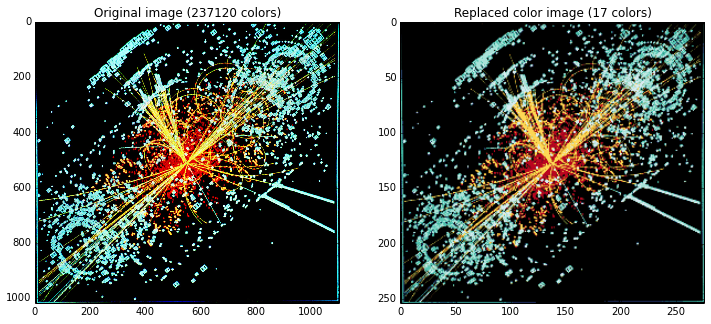

Creating your pattern in a file called Pattern.pdf.  Enjoy!
Adding Cover page
Adding page 0
Adding page 1
Adding page 2
Adding page 3
Adding page 4
Adding page 5
Adding page 6
Adding page 7
Adding page 8
Adding page 9
Adding page 10
Adding page 11
Adding page 12
All DONE!


In [2]:
#Call the testme function to do it all!
st.testme(1)

---